In [ ]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble

import pandas, xgboost, numpy, textblob, string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load the dataset
data = pandas.read_csv("/content/drive/MyDrive/DAIC-WOZ/clean_compiled_transcripts.csv")



In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Participant_ID  141 non-null    int64  
 1   Transcript      141 non-null    object 
 2   PHQ8_Binary     141 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.4+ KB


In [ ]:
# split the dataset into training and validation datasets 
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(data['Transcript'], data['PHQ8_Binary'], stratify=data.PHQ8_Binary, test_size=0.2)

# label encode the target variable 
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

In [ ]:
train_y

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0])

In [ ]:
# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(data['Transcript'])

# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(train_x)
xvalid_count =  count_vect.transform(valid_x)

In [ ]:
# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram.fit(data['Transcript'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)

In [ ]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return metrics.classification_report(predictions, valid_y)

In [ ]:
# SVM on Ngram Level TF IDF Vectors
accuracy = train_model(svm.SVC(class_weight='balanced'), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print("SVM, N-Gram Vectors: ", accuracy)

SVM, N-Gram Vectors:  [[20  9]
 [ 0  0]]


In [ ]:
# SVM on Ngram Level TF IDF Vectors
accuracy = train_model(svm.SVC(class_weight='balanced'), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print("SVM, N-Gram Vectors: ", accuracy)

SVM, N-Gram Vectors:                precision    recall  f1-score   support

           0       1.00      0.69      0.82        29
           1       0.00      0.00      0.00         0

    accuracy                           0.69        29
   macro avg       0.50      0.34      0.41        29
weighted avg       1.00      0.69      0.82        29



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Exploration

In [ ]:
pip install \
   pandas matplotlib numpy \
   nltk seaborn sklearn gensim pyldavis \
   wordcloud textblob spacy textstat

     |████████████████████████████████| 1.7 MB 7.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 101 kB 15.3 MB/s 
     |████████████████████████████████| 15.7 MB 45.3 MB/s 
     |████████████████████████████████| 11.3 MB 15.6 MB/s 
     |████████████████████████████████| 2.0 MB 66.6 MB/s 
  Created wheel for pyldavis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=6325bb9fd42b0c6ddb7fded9dd23cad0e6658c8864cb2604afd55d4879a1f3b5
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyldavis
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling p

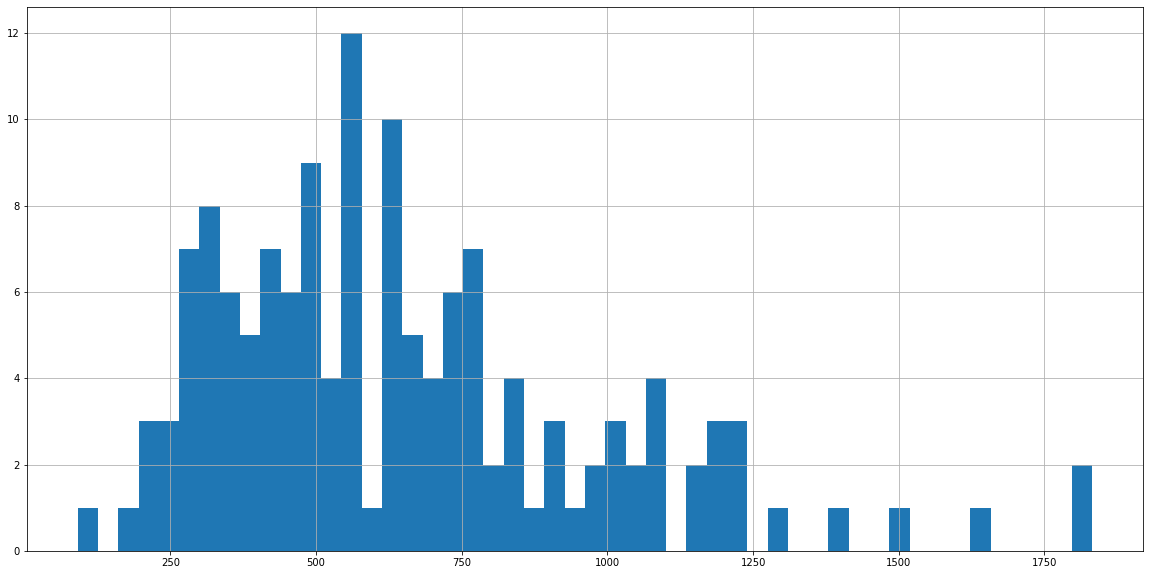

In [ ]:
data.Transcript.str.split().\
    map(lambda x: len(x)).\
    hist(bins=50, figsize=(20,10))

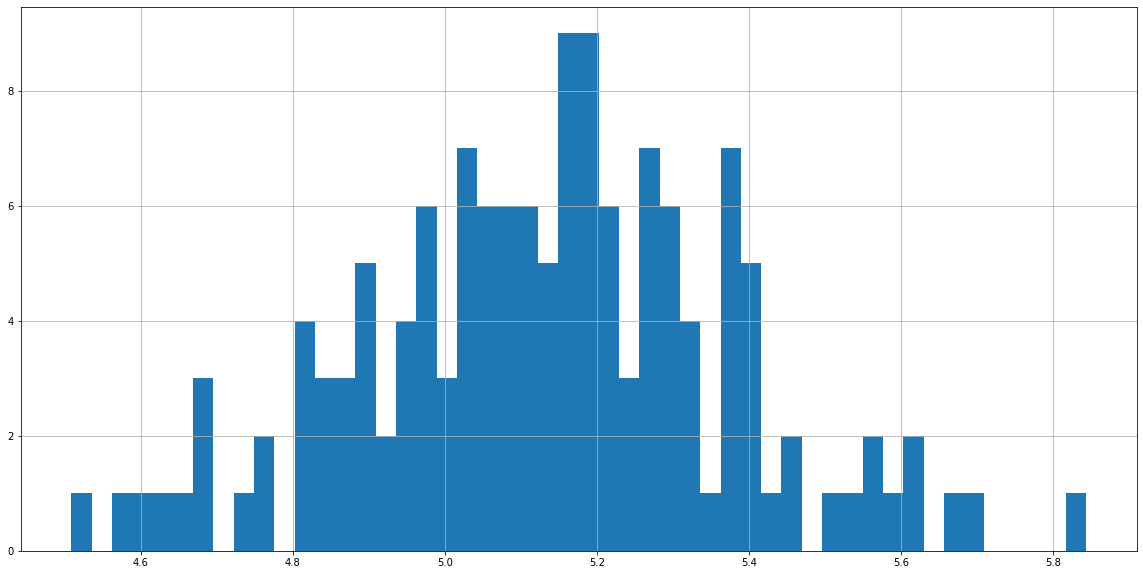

In [ ]:
data['Transcript'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: numpy.mean(x)).hist(bins=50, figsize=(20,10))

In [ ]:
from nltk.corpus import stopwords


In [ ]:
import nltk
nltk.download('stopwords')
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
corpus=[]
new= data['Transcript'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]
from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

In [ ]:
import collections
import seaborn as sns

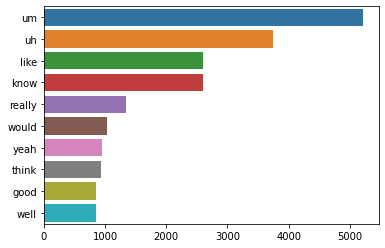

In [ ]:
counter=collections.Counter(corpus)
most=counter.most_common()
x, y= [], []
for word,count in most[:10]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

In [ ]:
from nltk.util import ngrams
list(ngrams(['I' ,'went','to','the','river','bank'],2))

[('I', 'went'),
 ('went', 'to'),
 ('to', 'the'),
 ('the', 'river'),
 ('river', 'bank')]

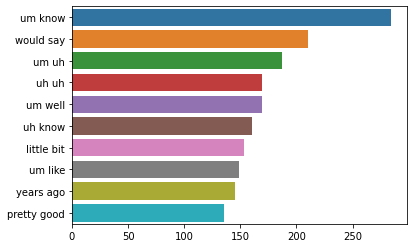

In [ ]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]
top_n_bigrams=get_top_ngram(data['Transcript'],2)[:10]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)

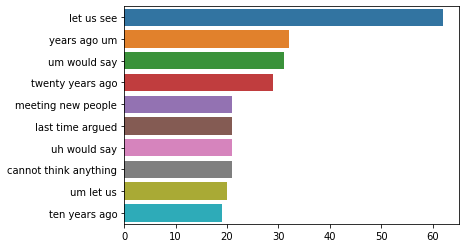

In [ ]:
top_tri_grams=get_top_ngram(data['Transcript'],n=3)
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x)

In [ ]:
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from nltk.tokenize import word_tokenize


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
def preprocess_news(df):
    corpus=[]
    stem=PorterStemmer()
    lem=WordNetLemmatizer()
    for news in data['Transcript']:
        words=[w for w in word_tokenize(news) if (w not in stop)]
        
        words=[lem.lemmatize(w) for w in words if len(w)>2]
        
        corpus.append(words)
    return corpus
corpus=preprocess_news(data.Transcript)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from gensim import corpora
from gensim import models


In [ ]:
dic=corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]

In [ ]:
lda_model = models.LdaMulticore(bow_corpus, 
                                   num_topics = 4, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
lda_model.show_topics()

[(0,
  '0.048*"like" + 0.036*"know" + 0.019*"really" + 0.015*"yeah" + 0.011*"good" + 0.011*"would" + 0.010*"people" + 0.010*"thing" + 0.009*"kind" + 0.008*"think"'),
 (1,
  '0.039*"know" + 0.029*"like" + 0.013*"really" + 0.011*"well" + 0.011*"thing" + 0.010*"yeah" + 0.009*"get" + 0.009*"people" + 0.009*"time" + 0.009*"would"'),
 (2,
  '0.019*"know" + 0.013*"like" + 0.013*"really" + 0.012*"would" + 0.012*"thing" + 0.011*"kind" + 0.011*"well" + 0.008*"think" + 0.007*"good" + 0.007*"get"'),
 (3,
  '0.030*"like" + 0.029*"know" + 0.016*"really" + 0.013*"would" + 0.012*"think" + 0.012*"thing" + 0.011*"yeah" + 0.011*"good" + 0.010*"people" + 0.010*"well"')]

In [ ]:
pip install pyLDAvis

In [ ]:
import pyLDAvis
import gensim
import pyLDAvis.gensim_models as pm

In [ ]:
pyLDAvis.enable_notebook()
vis = pm.prepare(lda_model, bow_corpus, dic)
vis